# Import Libraries

In [41]:
import json
import tensorflow as tf
import csv
import random
import numpy as np
import zipfile

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers

# Download Dataset

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/training_cleaned.csv \
    -O /tmp/training_cleaned.csv

--2021-09-18 18:22:38--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/training_cleaned.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 74.125.137.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 238942690 (228M) [application/octet-stream]
Saving to: ‘/tmp/training_cleaned.csv’

/tmp/training_clean 100%[===================>] 227.87M   103MB/s    in 2.2s    

2021-09-18 18:22:40 (103 MB/s) - ‘/tmp/training_cleaned.csv’ saved [238942690/238942690]



In [3]:
f = open("/tmp/training_cleaned.csv", "r")
print(f.readline())

for i in range(5):
  print(f.readline())
f.close()

"0","1467810369","Mon Apr 06 22:19:45 PDT 2009","NO_QUERY","_TheSpecialOne_","@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

"0","1467810672","Mon Apr 06 22:19:49 PDT 2009","NO_QUERY","scotthamilton","is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!"

"0","1467810917","Mon Apr 06 22:19:53 PDT 2009","NO_QUERY","mattycus","@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds"

"0","1467811184","Mon Apr 06 22:19:57 PDT 2009","NO_QUERY","ElleCTF","my whole body feels itchy and like its on fire "

"0","1467811193","Mon Apr 06 22:19:57 PDT 2009","NO_QUERY","Karoli","@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. "

"0","1467811372","Mon Apr 06 22:20:00 PDT 2009","NO_QUERY","joy_wolf","@Kwesidei not the whole crew "



In [4]:
num_sentences = 0
corpus = []

In [5]:
with open("/tmp/training_cleaned.csv") as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        list_item=[]
        list_item.append(row[5])
        this_label=row[0]
        if this_label=='0':
            list_item.append(0)
        else:
            list_item.append(1)
        num_sentences = num_sentences + 1
        corpus.append(list_item)

In [6]:
print(num_sentences)
print(len(corpus))
print(corpus[1])

1600000
1600000
["is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!", 0]


In [7]:
print(corpus[:5])

[["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D", 0], ["is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!", 0], ['@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds', 0], ['my whole body feels itchy and like its on fire ', 0], ["@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. ", 0]]


In [8]:
training_size=160000

In [9]:
sentences=[]
labels=[]
random.shuffle(corpus)
for x in range(training_size):
    sentences.append(corpus[x][0])
    labels.append(corpus[x][1])

In [10]:
print(len(sentences))
print(len(labels))

160000
160000


In [11]:
print(sentences[0])
print(labels[0])

@nycrican2 Thanks so much - she has been wanting this for a long long time, so we are so happy for her. And he is lovely too. 
1


# Tokenization & Sequences

In [15]:
embedding_dim = 100
max_length    = 16
trunc_type    = 'post'
padding_type  = 'post'
oov_tok       = "<OOV>"
test_portion  = .1

In [12]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
vocab_size = len(word_index)
print("Vocab Size: ", vocab_size)


Vocab Size:  138723


In [16]:
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, 
                       maxlen=max_length, 
                       padding=padding_type, 
                       truncating=trunc_type)


In [18]:
type(sequences), type(padded)

(list, numpy.ndarray)

In [19]:
print(len(sequences))
print(padded.shape)

160000
(160000, 16)


In [20]:
print(sequences[0])

[39653, 81, 15, 91, 138, 101, 98, 1402, 27, 11, 4, 178, 178, 50, 15, 60, 35, 15, 119, 11, 106, 6, 111, 8, 458, 41]


In [21]:
print(padded[0])

[39653    81    15    91   138   101    98  1402    27    11     4   178
   178    50    15    60]


# Splitting Data

In [22]:
split = int(test_portion * training_size)
print(split)

16000


In [23]:
test_sequences = padded[0:split]
training_sequences = padded[split:training_size]

test_labels = labels[0:split]
training_labels = labels[split:training_size]

In [24]:
print(len(test_sequences), len(test_labels))
print(len(training_sequences), len(training_labels))

16000 16000
144000 144000


In [30]:
print(vocab_size)

138723


In [31]:
print(word_index['i'])

1


In [38]:
few_items = list(word_index.items())[:100]
print(few_items)

[('i', 1), ('to', 2), ('the', 3), ('a', 4), ('my', 5), ('and', 6), ('you', 7), ('is', 8), ('it', 9), ('in', 10), ('for', 11), ('of', 12), ('on', 13), ('me', 14), ('so', 15), ('that', 16), ('have', 17), ("i'm", 18), ('but', 19), ('just', 20), ('with', 21), ('be', 22), ('at', 23), ('not', 24), ('was', 25), ('now', 26), ('this', 27), ('up', 28), ('good', 29), ('day', 30), ('all', 31), ('out', 32), ('get', 33), ('like', 34), ('are', 35), ('no', 36), ('go', 37), ('quot', 38), ('http', 39), ('today', 40), ('too', 41), ('do', 42), ("it's", 43), ('your', 44), ('work', 45), ('going', 46), ('love', 47), ('got', 48), ('lol', 49), ('time', 50), ('back', 51), ('from', 52), ('u', 53), ('one', 54), ('com', 55), ('what', 56), ('im', 57), ('will', 58), ('know', 59), ('we', 60), ('really', 61), ("don't", 62), ('about', 63), ('am', 64), ('amp', 65), ('had', 66), ('can', 67), ('see', 68), ("can't", 69), ('its', 70), ('some', 71), ('if', 72), ('still', 73), ('night', 74), ('new', 75), ('2', 76), ('how', 77

# Download GloVe

* 100 dimension version of GloVe from Stanford
* https://www.kaggle.com/danielwillgeorge/glove6b100dtxt
* https://nlp.stanford.edu/projects/glove/

In [39]:
!wget https://nlp.stanford.edu/data/glove.6B.zip

--2021-09-18 20:01:59--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-09-18 20:02:00--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  4.86MB/s    in 2m 40s  

2021-09-18 20:04:40 (5.12 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [42]:
zipref = zipfile.ZipFile('glove.6B.zip', 'r')
zipref.extractall()
zipref.close()

In [44]:
glove_100d = 'glove.6B.100d.txt'

f = open(glove_100d, "r")
print(f.readline())

for i in range(5):
  print(f.readline())
f.close()

the -0.038194 -0.24487 0.72812 -0.39961 0.083172 0.043953 -0.39141 0.3344 -0.57545 0.087459 0.28787 -0.06731 0.30906 -0.26384 -0.13231 -0.20757 0.33395 -0.33848 -0.31743 -0.48336 0.1464 -0.37304 0.34577 0.052041 0.44946 -0.46971 0.02628 -0.54155 -0.15518 -0.14107 -0.039722 0.28277 0.14393 0.23464 -0.31021 0.086173 0.20397 0.52624 0.17164 -0.082378 -0.71787 -0.41531 0.20335 -0.12763 0.41367 0.55187 0.57908 -0.33477 -0.36559 -0.54857 -0.062892 0.26584 0.30205 0.99775 -0.80481 -3.0243 0.01254 -0.36942 2.2167 0.72201 -0.24978 0.92136 0.034514 0.46745 1.1079 -0.19358 -0.074575 0.23353 -0.052062 -0.22044 0.057162 -0.15806 -0.30798 -0.41625 0.37972 0.15006 -0.53212 -0.2055 -1.2526 0.071624 0.70565 0.49744 -0.42063 0.26148 -1.538 -0.30223 -0.073438 -0.28312 0.37104 -0.25217 0.016215 -0.017099 -0.38984 0.87424 -0.72569 -0.51058 -0.52028 -0.1459 0.8278 0.27062

, -0.10767 0.11053 0.59812 -0.54361 0.67396 0.10663 0.038867 0.35481 0.06351 -0.094189 0.15786 -0.81665 0.14172 0.21939 0.58505 -0.52158

In [45]:
embeddings_index = {}

with open('glove.6B.100d.txt') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

In [46]:
print(embeddings_index['the'])

[-0.038194 -0.24487   0.72812  -0.39961   0.083172  0.043953 -0.39141
  0.3344   -0.57545   0.087459  0.28787  -0.06731   0.30906  -0.26384
 -0.13231  -0.20757   0.33395  -0.33848  -0.31743  -0.48336   0.1464
 -0.37304   0.34577   0.052041  0.44946  -0.46971   0.02628  -0.54155
 -0.15518  -0.14107  -0.039722  0.28277   0.14393   0.23464  -0.31021
  0.086173  0.20397   0.52624   0.17164  -0.082378 -0.71787  -0.41531
  0.20335  -0.12763   0.41367   0.55187   0.57908  -0.33477  -0.36559
 -0.54857  -0.062892  0.26584   0.30205   0.99775  -0.80481  -3.0243
  0.01254  -0.36942   2.2167    0.72201  -0.24978   0.92136   0.034514
  0.46745   1.1079   -0.19358  -0.074575  0.23353  -0.052062 -0.22044
  0.057162 -0.15806  -0.30798  -0.41625   0.37972   0.15006  -0.53212
 -0.2055   -1.2526    0.071624  0.70565   0.49744  -0.42063   0.26148
 -1.538    -0.30223  -0.073438 -0.28312   0.37104  -0.25217   0.016215
 -0.017099 -0.38984   0.87424  -0.72569  -0.51058  -0.52028  -0.1459
  0.8278    0.27062 ]

In [48]:
embeddings_matrix = np.zeros((vocab_size+1, embedding_dim))
print(embeddings_matrix.shape)

(138724, 100)


In [49]:
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector

In [50]:
print(len(embeddings_matrix))

138724


In [56]:
print(embeddings_matrix[0].shape)
embeddings_matrix[2]


(100,)


array([-1.89700007e-01,  5.00239991e-02,  1.90840006e-01, -4.91839983e-02,
       -8.97369981e-02,  2.10060000e-01, -5.49520016e-01,  9.83769968e-02,
       -2.01350003e-01,  3.42409998e-01, -9.26769972e-02,  1.60999998e-01,
       -1.32679999e-01, -2.81599998e-01,  1.87370002e-01, -4.29589987e-01,
        9.60389972e-01,  1.39719993e-01, -1.07809997e+00,  4.05180007e-01,
        5.05389988e-01, -5.50639987e-01,  4.84400004e-01,  3.80439997e-01,
       -2.90549989e-03, -3.49420011e-01, -9.96960029e-02, -7.83680022e-01,
        1.03629994e+00, -2.31399998e-01, -4.71210003e-01,  5.71259975e-01,
       -2.14540005e-01,  3.59580010e-01, -4.83190000e-01,  1.08749998e+00,
        2.85239995e-01,  1.24470003e-01, -3.92480008e-02, -7.67320022e-02,
       -7.63429999e-01, -3.24090004e-01, -5.74899971e-01, -1.08930004e+00,
       -4.18110013e-01,  4.51200008e-01,  1.21119998e-01, -5.13670027e-01,
       -1.33489996e-01, -1.13779998e+00, -2.87680000e-01,  1.67740002e-01,
        5.58040023e-01,  

# Create the Model

In [57]:
training_padded = np.array(training_sequences)
training_labels = np.array(training_labels)
testing_padded = np.array(test_sequences)
testing_labels = np.array(test_labels)

In [59]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size+1,
                              output_dim=embedding_dim,
                              input_length=max_length,
                              weights=[embeddings_matrix],
                              trainable=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(4),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [60]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 16, 100)           13872400  
_________________________________________________________________
dropout (Dropout)            (None, 16, 100)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 12, 64)            32064     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 3, 64)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 13,937,553
Trainable params: 65,153
Non-trainable params: 13,872,400
_______________________________________

In [61]:
num_epochs = 50

history = model.fit(training_padded, 
                    training_labels, 
                    epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels))


Epoch 1/50
4500/4500 [==============================] - 31s 6ms/step - loss: 0.5666 - accuracy: 0.7014 - val_loss: 0.5216 - val_accuracy: 0.7384
Epoch 2/50
4500/4500 [==============================] - 28s 6ms/step - loss: 0.5275 - accuracy: 0.7320 - val_loss: 0.5079 - val_accuracy: 0.7471
Epoch 3/50
4500/4500 [==============================] - 28s 6ms/step - loss: 0.5124 - accuracy: 0.7421 - val_loss: 0.5014 - val_accuracy: 0.7513
Epoch 4/50
4500/4500 [==============================] - 28s 6ms/step - loss: 0.4995 - accuracy: 0.7520 - val_loss: 0.4979 - val_accuracy: 0.7542
Epoch 5/50
4500/4500 [==============================] - 28s 6ms/step - loss: 0.4912 - accuracy: 0.7582 - val_loss: 0.4973 - val_accuracy: 0.7569
Epoch 6/50
4500/4500 [==============================] - 28s 6ms/step - loss: 0.4836 - accuracy: 0.7619 - val_loss: 0.4928 - val_accuracy: 0.7588
Epoch 7/50
4500/4500 [==============================] - 28s 6ms/step - loss: 0.4775 - accuracy: 0.7672 - val_loss: 0.4985 - val_ac

<Figure size 432x288 with 0 Axes>

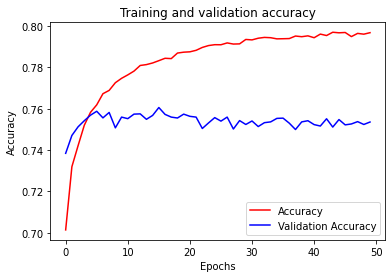

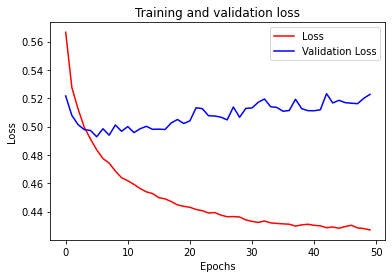

<Figure size 432x288 with 0 Axes>

In [62]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()
